##### Figure S12: depth and mapping quality in the vicinity of Vgsc

In [15]:
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd

import allel

import ingenos

In [2]:
base_path = "/overflow/dschridelab/users/rrlove/aedes/"
md_path = f"{base_path}metadata/"
results_path = f"{base_path}results/"
depth_path = f"{results_path}qc/depth/"

In [3]:
chroms = ["AaegL5_1", "AaegL5_2", "AaegL5_3"]

countries = ["Colombia", "Brazil", "USA", "Gabon", "Kenya", "Senegal"]

##### read in the metadata

In [4]:
md = pd.read_table(
    md_path + "whole_sample_sorted_country.031522.csv", 
    sep="\t",)

md["locality"] = md["location"].str.split(": ", expand=True)[1]

md.head()

,sample_id,sample_short,location,sex,batch,sample_id_cat,country,locality
0,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,FEMALE_1,Colombia: Rio Claro,F,1,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,Colombia,Rio Claro
1,FEMALE_10-F10_GTGCCATA-ACTAGGAG_S2,FEMALE_10,Colombia: Rio Claro,F,1,FEMALE_10-F10_GTGCCATA-ACTAGGAG_S2,Colombia,Rio Claro
2,FEMALE_11-F11_CGTTGCAA-CGCTCTAT_S3,FEMALE_11,Colombia: Rio Claro,F,1,FEMALE_11-F11_CGTTGCAA-CGCTCTAT_S3,Colombia,Rio Claro
3,FEMALE_12-F12_TGAAGACG-TGGCATGT_S4,FEMALE_12,Colombia: Rio Claro,F,1,FEMALE_12-F12_TGAAGACG-TGGCATGT_S4,Colombia,Rio Claro
4,FEMALE_14-F14_ACGTTCAG-GCACAACT_S6,FEMALE_14,Colombia: Rio Claro,F,1,FEMALE_14-F14_ACGTTCAG-GCACAACT_S6,Colombia,Rio Claro


##### read in the list of specimens to be dropped because they are closely related to other specimens

In [5]:
to_drop = np.loadtxt(md_path + "close_kin_removed_new_dataset.txt",
                    dtype=str)

to_drop_bool = (~(md["sample_short"].isin(to_drop)).values)

np.sum(to_drop_bool)

123

In [6]:
md_filtered = md.loc[to_drop_bool]

md_filtered.shape

(123, 8)

##### read in the mapq data

In [7]:
mapq_path = f"{results_path}qc/Vssc_mapq/"

specimen_mapq = {}

for _, row in md_filtered.iterrows():
    
    name = row["sample_id"]
    
    in_path = mapq_path + f"{name}_mapq/{name}_Vssc_region_mapq.txt.gz"
    
    mapq_in = pd.read_table(in_path, sep="\s+", names=["pos", "mapq_" + name])
    
    specimen_mapq[name] = mapq_in.groupby("pos").mean().reset_index()

In [8]:
mapqs = reduce(lambda left,right: pd.merge(left,right, how="outer"), \
       [df for df in specimen_mapq.values()])

mapqs.shape

(9558794, 124)

In [9]:
mapqs.head()

,pos,mapq_FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,mapq_FEMALE_10-F10_GTGCCATA-ACTAGGAG_S2,mapq_FEMALE_11-F11_CGTTGCAA-CGCTCTAT_S3,mapq_FEMALE_12-F12_TGAAGACG-TGGCATGT_S4,mapq_FEMALE_14-F14_ACGTTCAG-GCACAACT_S6,mapq_FEMALE_15-F15_ATGCACGA-GACGATCT_S7,mapq_FEMALE_18-F18_GAATCCGA-CACTAGCT_S10,mapq_FEMALE_2-F2_CTTAGGAC-GTAGGAGT_S12,mapq_FEMALE_20-F20_GTTACGCA-ATCGCCAT_S13,...,mapq_SRR6768019,mapq_SRR6768020,mapq_SRR6768021,mapq_SRR6768022,mapq_SRR6768023,mapq_SRR6768024,mapq_SRR6768025,mapq_SRR6768026,mapq_SRR6768027,mapq_SRR6768028
0,309999880,60.0,60.0,60.0,NaN,NaN,NaN,60.0,NaN,NaN,...,NaN,60.0,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
1,309999884,60.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,309999896,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,60.0,NaN,60.0,NaN,NaN,NaN,NaN,NaN
3,309999924,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,309999961,0.0,NaN,NaN,60.0,NaN,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### average these

In [10]:
mapqs_average = mapqs.set_index("pos").mean(axis=1).reset_index().sort_values("pos")

mapqs_average.columns = ["pos", "mean_mapq"]

mapqs_average.head()

,pos,mean_mapq
9090054,309999849,60.0
9007618,309999850,60.0
1724108,309999851,60.0
4539169,309999852,60.0
758410,309999853,60.0


In [11]:
mapq_mean, mapq_windows, mapq_counts = \
allel.windowed_statistic(mapqs_average["pos"], mapqs_average["mean_mapq"], 
                         np.nanmean, size=10000, step=1000)

In [12]:
vgsc_bounds = [315926360, 316405639]

In [13]:
snps = [315939224, 315983763, 315999297, 316014588, 316080722]

##### read in the depths

In [14]:
vgsc_depth = {}

for _, row in md_filtered.iterrows():
    
    name = row["sample_short"]
    
    in_path = (depth_path + name + f"/{name}_Vssc_trimmed.per-base.bed.gz")

    in_bed = pd.read_table(in_path, names=["chrom", "start", "end", "mean_depth"])
        
    in_bed["range"] = \
    [range(start, end) for (start, end) in in_bed[["start", "end"]].values]
    
    in_bed = in_bed.explode("range")

    in_bed.reset_index(inplace=True, drop=True)
    
    in_bed = in_bed.loc[((in_bed["range"] >= 314000000) & (in_bed["range"] <= 317000000)),
                       ["chrom", "range", "mean_depth"]]
    
    in_bed.rename(columns={"mean_depth" : name, "range" : "pos"}, inplace=True)
    
    vgsc_depth[name] = in_bed
    
    print(name, in_bed.shape)

FEMALE_1 (3000001, 3)
FEMALE_10 (3000001, 3)
FEMALE_11 (3000001, 3)
FEMALE_12 (3000001, 3)
FEMALE_14 (3000001, 3)
FEMALE_15 (3000001, 3)
FEMALE_18 (3000001, 3)
FEMALE_2 (3000001, 3)
FEMALE_20 (3000001, 3)
FEMALE_21 (3000001, 3)
FEMALE_3 (3000001, 3)
FEMALE_5 (3000001, 3)
FEMALE_6 (3000001, 3)
FEMALE_7 (3000001, 3)
FEMALE_8 (3000001, 3)
FEMALE_9 (3000001, 3)
JB_A2_18_S1 (3000001, 3)
JB_A2_19_S2 (3000001, 3)
JB_A2_25_S3 (3000001, 3)
JB_A2_29_S4 (3000001, 3)
JB_A2_34_S5 (3000001, 3)
JB_A2_35_S6 (3000001, 3)
JB_A2_36_S7 (3000001, 3)
JB_A2_39_S8 (3000001, 3)
JB_A2_46_S9 (3000001, 3)
JB_A2_50_S10 (3000001, 3)
MALE_1 (3000001, 3)
MALE_2 (3000001, 3)
MALE_3 (3000001, 3)
MALE_4 (3000001, 3)
MALE_5 (3000001, 3)
MALE_6 (3000001, 3)
SRR11006665 (3000001, 3)
SRR11006666 (3000001, 3)
SRR11006667 (3000001, 3)
SRR11006668 (3000001, 3)
SRR11006669 (3000001, 3)
SRR11006670 (3000001, 3)
SRR11006672 (3000001, 3)
SRR11006673 (3000001, 3)
SRR11006675 (3000001, 3)
SRR11006676 (3000001, 3)
SRR11006677 (300000

In [16]:
len(vgsc_depth)

123

##### merge

In [17]:
vgsc_depths = reduce(lambda left,right: pd.merge(left,right), \
       [df for df in vgsc_depth.values()])

vgsc_depths.shape

(3000001, 125)

In [18]:
vgsc_depths.head()

,chrom,pos,FEMALE_1,FEMALE_10,FEMALE_11,FEMALE_12,FEMALE_14,FEMALE_15,FEMALE_18,FEMALE_2,...,SRR6768019,SRR6768020,SRR6768021,SRR6768022,SRR6768023,SRR6768024,SRR6768025,SRR6768026,SRR6768027,SRR6768028
0,AaegL5_3,314000000,10,4,21,25,15,11,20,15,...,15,10,19,8,10,6,8,11,12,13
1,AaegL5_3,314000001,10,4,21,25,15,11,21,15,...,15,10,20,8,10,5,8,10,12,13
2,AaegL5_3,314000002,10,4,21,25,15,10,20,16,...,15,10,18,8,10,5,8,10,11,13
3,AaegL5_3,314000003,10,4,21,26,15,9,19,16,...,15,10,17,8,10,5,8,10,11,13
4,AaegL5_3,314000004,10,4,21,26,15,9,19,15,...,15,10,17,8,10,5,8,10,11,13


##### average

In [19]:
vgsc_depths_collated = vgsc_depths.set_index(
    ["chrom", "pos"]).mean(axis=1).reset_index()

vgsc_depths_collated.columns = ["chrom", "pos", "mean_depth"]

vgsc_depths_collated.head()

,chrom,pos,mean_depth
0,AaegL5_3,314000000,9.560976
1,AaegL5_3,314000001,9.585366
2,AaegL5_3,314000002,9.479675
3,AaegL5_3,314000003,9.471545
4,AaegL5_3,314000004,9.471545


In [20]:
vgsc_out, vgsc_windows, vgsc_counts = \
allel.windowed_statistic(vgsc_depths_collated["pos"], 
        vgsc_depths_collated["mean_depth"], np.nanmean, size=10000, step=1000)

In [21]:
outString = ingenos.make_date_stamp(results_path + \
                                    "qc/Vgsc_depth_and_mq_five_loci", 
                                    ".pdf")

outString

'/overflow/dschridelab/users/rrlove/aedes/results/qc/Vgsc_depth_and_mq_five_loci.021023.pdf'

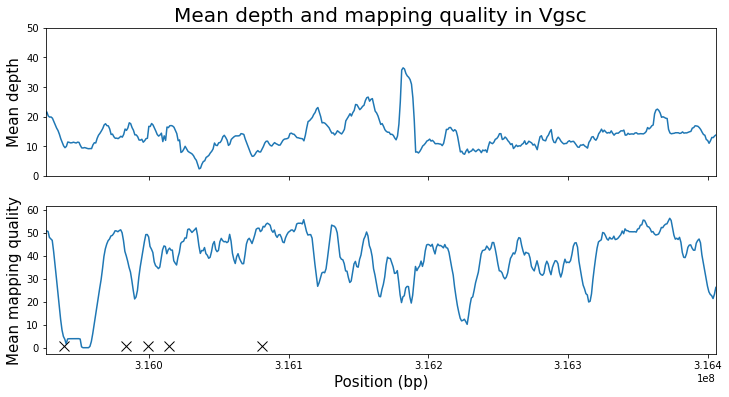

In [23]:
fig, axes = plt.subplots(nrows=2, figsize=(12, 6), sharex=True)

ax = axes[0]

ax.plot(np.mean(vgsc_windows, axis=1), 
            vgsc_out)

ax.set_ylabel("Mean depth", fontsize=15)

ax.set_ylim([0, 50])

ax.set_title("Mean depth and mapping quality in Vgsc",
         fontsize=20)

ax = axes[1]

ax.plot(np.mean(mapq_windows, axis=1), 
            mapq_mean)

ax.set_xlim([315926360, 316405639])

trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for snp in snps:
    
    ax.plot(snp, 0.05, marker="x", markersize=10, color="black", transform=trans, linestyle=" ")
    
lower_bound = ax.get_ylim()[0]
ax.set_ylim(bottom=lower_bound*.9)

ax.set_xlabel("Position (bp)", fontsize=15)
ax.set_ylabel("Mean mapping quality", fontsize=15)

#plt.savefig(outString, bbox_inches="tight")